In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
Australian_weather=pd.read_csv('weatherAUS.csv', low_memory=False)

In [3]:
Wind_direction_encode={'N' : (0, 1), 'NNW' : (-0.5, 1), 'NW' : (-1, 1), 'WNW' : (-1, 0.5), 'W' : (-1, 0), 'WSW' : (-1, -0.5), 'SW' : (-1, -1), 'SSW' : (-0.5, -1), 'S' : (0, -1), 'SSE' : (0.5, -1), 'SE' : (1, -1), 'ESE' : (1, -0.5), 'E' : (1, 0), 'ENE' : (1, 0.5), 'NE' : (1, 1), 'NNE' : (0.5, 1)}
Wind_direction_decode={(0, 1) : 'N', (-0.5, 1) : 'NNW', (-1, 1) : 'NW', (-1, 0.5) : 'WNW', (-1, 0) : 'W', (-1, -0.5) : 'WSW', (-1, -1) : 'SW', (-0.5, -1) : 'SSW', (0, -1) : 'S', (0.5, -1) : 'SSE', (1, -1) : 'SE', (1, -0.5) : 'ESE', (1, 0) : 'E', (1, 0.5) : 'ENE', (1, 1) : 'NE', (0.5, 1) : 'NNE'}

In [4]:
Australian_weather['Location'] = Australian_weather['Location'].astype('category')
Australian_weather[['Year', 'Month', 'Day']] = pd.DataFrame({
    'Year': pd.to_datetime(Australian_weather['Date']).dt.year,
    'Month': pd.to_datetime(Australian_weather['Date']).dt.month,
    'Day': pd.to_datetime(Australian_weather['Date']).dt.day}).astype('float')
Australian_weather[['WindGustDir_East', 'WindGustDir_Nord']] = pd.DataFrame(Australian_weather['WindGustDir'].map(Wind_direction_encode).values.tolist(), index=Australian_weather.index)
Australian_weather[['WindDir9am_East', 'WindDir9am_Nord']] = pd.DataFrame(Australian_weather['WindDir9am'].map(Wind_direction_encode).values.tolist(), index=Australian_weather.index)
Australian_weather[['WindDir3pm_East', 'WindDir3pm_Nord']] = pd.DataFrame(Australian_weather['WindDir3pm'].map(Wind_direction_encode).values.tolist(), index=Australian_weather.index)
Australian_weather['RainToday'] = Australian_weather['RainToday'].map({'Yes' : 1, 'No' : 0})
Australian_weather['RainTomorrow'] = Australian_weather['RainTomorrow'].map({'Yes' : 1, 'No' : 0})
Australian_weather['Evaporation'] = Australian_weather['Evaporation'].fillna((Australian_weather['Evaporation'].mean()))
Australian_weather['Sunshine'] = Australian_weather['Sunshine'].fillna((Australian_weather['Sunshine'].mean()))
Australian_weather['Humidity9am'] = Australian_weather['Humidity9am'].fillna((Australian_weather['Humidity9am'].mean()))
Australian_weather['Humidity3pm'] = Australian_weather['Humidity3pm'].fillna((Australian_weather['Humidity3pm'].mean()))
Australian_weather['Pressure9am'] = Australian_weather['Pressure9am'].fillna((Australian_weather['Pressure9am'].mean()))
Australian_weather['Pressure3pm'] = Australian_weather['Pressure3pm'].fillna((Australian_weather['Pressure3pm'].mean()))
Australian_weather['Cloud9am'] = Australian_weather['Cloud9am'].fillna((Australian_weather['Cloud9am'].mean()))
Australian_weather['Cloud3pm'] = Australian_weather['Cloud3pm'].fillna((Australian_weather['Cloud3pm'].mean()))
Australian_weather.dropna(inplace=True)

In [5]:
Australian_weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainTomorrow,Year,Month,Day,WindGustDir_East,WindGustDir_Nord,WindDir9am_East,WindDir9am_Nord,WindDir3pm_East,WindDir3pm_Nord
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,0.0,2008.0,12.0,1.0,-1.0,0.0,-1.0,0.0,-1.0,0.5
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,0.0,2008.0,12.0,2.0,-1.0,0.5,-0.5,1.0,-1.0,-0.5
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,0.0,2008.0,12.0,3.0,-1.0,-0.5,-1.0,0.0,-1.0,-0.5
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,0.0,2008.0,12.0,4.0,1.0,1.0,1.0,-1.0,1.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,0.0,2008.0,12.0,5.0,-1.0,0.0,1.0,0.5,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,5.468232,7.611178,E,31.0,ESE,...,0.0,2017.0,6.0,20.0,1.0,0.0,1.0,-0.5,1.0,0.0
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.468232,7.611178,E,31.0,SE,...,0.0,2017.0,6.0,21.0,1.0,0.0,1.0,-1.0,1.0,0.5
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.468232,7.611178,NNW,22.0,SE,...,0.0,2017.0,6.0,22.0,-0.5,1.0,1.0,-1.0,0.0,1.0
145457,2017-06-23,Uluru,5.4,26.9,0.0,5.468232,7.611178,N,37.0,SE,...,0.0,2017.0,6.0,23.0,0.0,1.0,1.0,-1.0,-1.0,0.5


In [6]:
Australian_weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,RainTomorrow,Year,Month,Day,WindGustDir_East,WindGustDir_Nord,WindDir9am_East,WindDir9am_Nord,WindDir3pm_East,WindDir3pm_Nord
count,122591.000000,122591.000000,122591.000000,122591.000000,122591.000000,122591.000000,122591.000000,122591.000000,122591.000000,122591.000000,...,122591.000000,122591.000000,122591.000000,122591.000000,122591.000000,122591.000000,122591.000000,122591.000000,122591.000000,122591.000000
mean,12.385311,23.441524,2.356392,5.543028,7.671235,40.685776,15.024268,19.201809,67.680528,50.803579,...,0.220930,2012.793150,6.433662,15.711994,-0.020838,-0.066171,0.031299,0.002741,-0.023081,-0.058724
std,6.334888,7.145822,8.476141,3.246869,2.791447,13.391705,8.317349,8.580773,19.012645,20.881484,...,0.414875,2.525664,3.475645,8.788600,0.831401,0.819760,0.812266,0.838508,0.832087,0.823750
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,2007.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,7.800000,18.100000,0.000000,4.000000,7.611178,31.000000,9.000000,13.000000,56.000000,36.000000,...,0.000000,2011.000000,3.000000,8.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,12.200000,23.000000,0.000000,5.468232,7.611178,39.000000,13.000000,19.000000,68.880831,51.000000,...,0.000000,2013.000000,6.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,28.500000,0.800000,5.600000,9.000000,48.000000,20.000000,24.000000,82.000000,65.000000,...,0.000000,2015.000000,9.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,33.900000,48.100000,367.600000,86.200000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,...,1.000000,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
Australian_weather.dtypes

Date                  object
Location            category
MinTemp              float64
MaxTemp              float64
Rainfall             float64
Evaporation          float64
Sunshine             float64
WindGustDir           object
WindGustSpeed        float64
WindDir9am            object
WindDir3pm            object
WindSpeed9am         float64
WindSpeed3pm         float64
Humidity9am          float64
Humidity3pm          float64
Pressure9am          float64
Pressure3pm          float64
Cloud9am             float64
Cloud3pm             float64
Temp9am              float64
Temp3pm              float64
RainToday            float64
RainTomorrow         float64
Year                 float64
Month                float64
Day                  float64
WindGustDir_East     float64
WindGustDir_Nord     float64
WindDir9am_East      float64
WindDir9am_Nord      float64
WindDir3pm_East      float64
WindDir3pm_Nord      float64
dtype: object

In [8]:
X=Australian_weather[['MinTemp', 'WindGustSpeed', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'RainToday', 'Year', 'Month', 'Day', 'WindGustDir_East', 'WindGustDir_Nord']]
y=Australian_weather.RainTomorrow
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=23)

In [9]:
from sklearn.naive_bayes import BernoulliNB

classifier = BernoulliNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

In [10]:
print (np.mean(prediction == y_test))

0.7660858783607413


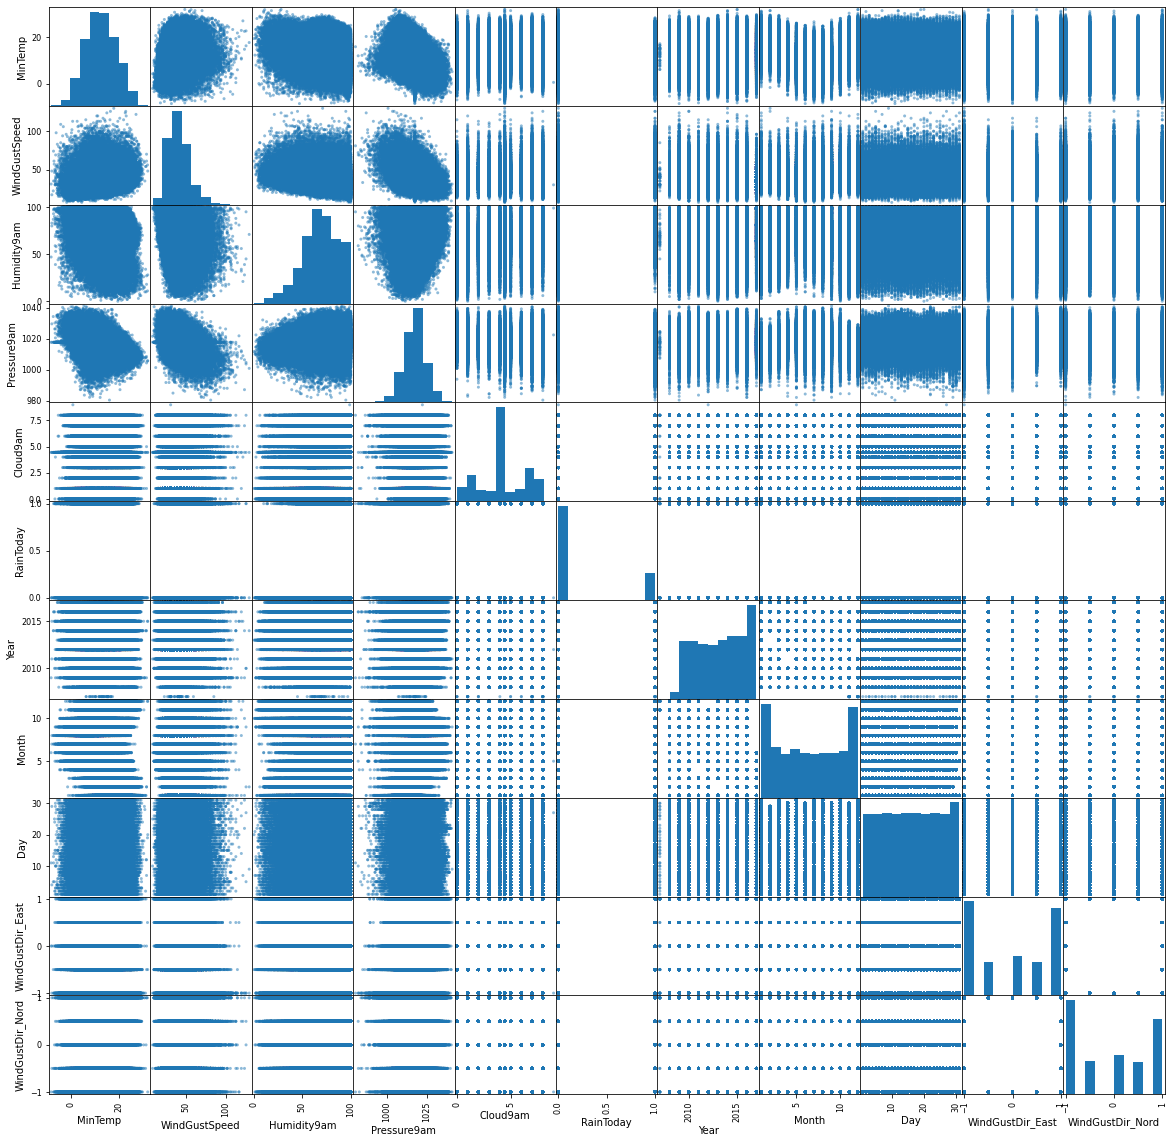

In [11]:
pd.plotting.scatter_matrix(X_train, figsize=(20,20));

In [12]:
from sklearn.naive_bayes import  GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
print ('Наивный Байес по распределению Гаусса', np.mean(prediction == y_test))

Наивный Байес по распределению Гаусса 0.7885016966849386


In [13]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty =  'l2', max_iter = 5000)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
print ('Логистическая регрессия', np.mean(prediction == y_test))

Логистическая регрессия 0.8161380840511616


In [14]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
prediction = neigh.predict(X_test)
print ('К соседей', np.mean(prediction == y_test))

К соседей 0.7588423388149308
